Assigment 1

I want you to use 3 different feature scale methods separately. write a function for this and return the X_scaled variable. Compare the mean squared error results from the 3 methods and report your results. It would be better if you change the code completely into functions (function for cost calculation etc.).


Mean Squared Error (Max): 1883.0785861457148
Mean Squared Error (Mean): 15403.370506695946
Mean Squared Error (Z-Score): 3329.974466558134


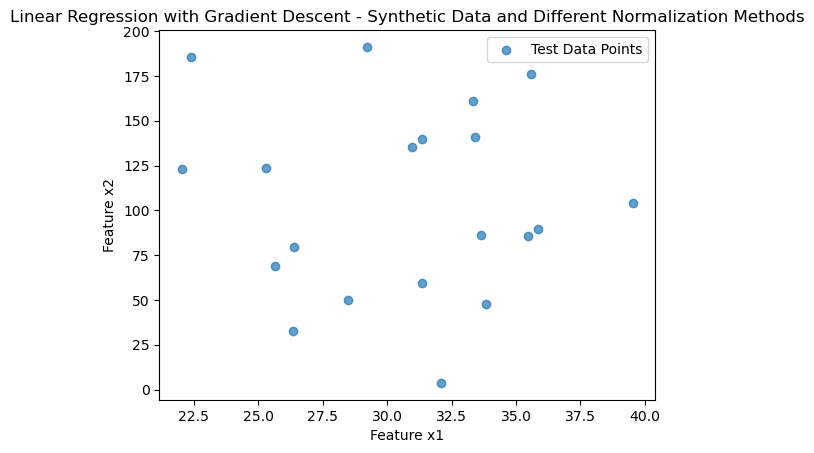

Learned Coefficients (Max):
[[970.68201825]
 [848.0673906 ]]
Bias (Intercept): 1248.161630212336

Learned Coefficients (Mean):
[[331.5467562 ]
 [534.03973297]]
Bias (Intercept): 2404.5160840465232

Learned Coefficients (Z-Score):
[[179.22468638]
 [281.22582073]]
Bias (Intercept): 2404.5160840465237


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic data with different feature scales
np.random.seed(0)

# Daily temperature (feature x1) with a range of [20, 40] degrees Celsius
temperature = 20 + 20 * np.random.rand(100, 1)

# Ice cream sales (feature x2) with a range of [0, 200] units
ice_cream_sales = 200 * np.random.rand(100, 1)

# Combine temperature and ice cream sales into a single feature matrix X
X = np.hstack((temperature, ice_cream_sales))

# Daily profit (target variable y)
# Assume that daily profit depends on the temperature, ice cream sales,
# and some random noise (normal distribution)
daily_profit = 1000 + 30 * temperature + 5 * ice_cream_sales + np.random.randn(100, 1)

# Now, you have synthetic data to analyze and build a predictive model for daily profit based on temperature and ice cream sales.

# Perform mean normalization (standardization) on input features

#!!! create a function and scale our X and return X_scaled
#!!! do this for whole method like max, mean and z-score 
#!!! compare the result

def normalize_max(X):
    return X / np.max(X, axis = 0)
    
def normalize_mean(X):
    return (X -np.mean(X, axis = 0)) / (np.max(X, axis = 0) - np.min(X, axis = 0))

def normalize_z_score(X):
    return (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, daily_profit, test_size=0.2, random_state=42)

# calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to perform gradient descent and return the learned coefficients
def gradient_descent(X_train, y_train, alpha, num_iterations):
    n_features = X_train.shape[1]
    w = np.zeros((n_features, 1))
    b = 0
    m = len(X_train)

    for iteration in range(num_iterations):
        y_pred = np.dot(X_train, w) + b
        w_gradient = (1 / m) * np.dot(X_train.T, (y_pred - y_train))
        b_gradient = (1 / m) * np.sum(y_pred - y_train)
        w -= alpha * w_gradient.reshape(-1, 1)
        b -= alpha * b_gradient

    return w, b

# normalization and gradient descent
X_scaled_max = normalize_max(X_train)
w_max, b_max = gradient_descent(X_scaled_max, y_train, alpha=0.01, num_iterations=1000)
y_pred_max = np.dot(normalize_max(X_test), w_max) + b_max
mse_max = calculate_mse(y_test, y_pred_max)
print("Mean Squared Error (Max):", mse_max)


X_scaled_mean = normalize_mean(X_train)
w_mean, b_mean = gradient_descent(X_scaled_mean, y_train, alpha=0.01, num_iterations=1000)
y_pred_mean = np.dot(normalize_mean(X_test), w_mean) + b_mean
mse_mean = calculate_mse(y_test, y_pred_mean)
print("Mean Squared Error (Mean):", mse_mean)


X_scaled_z_score = normalize_z_score(X_train)
w_z_score, b_z_score = gradient_descent(X_scaled_z_score, y_train, alpha=0.01, num_iterations=1000)
y_pred_z_score = np.dot(normalize_z_score(X_test), w_z_score) + b_z_score
mse_z_score = calculate_mse(y_test, y_pred_z_score)
print("Mean Squared Error (Z-Score):", mse_z_score)

# Plot one feature (e.g., x1) against y_test
plt.scatter(X_test[:, 0], X_test[:, 1], label='Test Data Points', alpha=0.7)
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.title('Linear Regression with Gradient Descent - Synthetic Data and Different Normalization Methods')
plt.show()

# Print the learned coefficients for each normalization method
print("Learned Coefficients (Max):")
print(w_max)
print("Bias (Intercept):", b_max)

print("\nLearned Coefficients (Mean):")
print(w_mean)
print("Bias (Intercept):", b_mean)

print("\nLearned Coefficients (Z-Score):")
print(w_zscore)
print("Bias (Intercept):", b_zscore)